In [1]:
%matplotlib inline
import pandas as pd


titles = pd.read_csv('cast.csv', index_col=None)
titles.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# 1. Using groupby(), plot the number of films that have been released each deacde in the history of cinemas

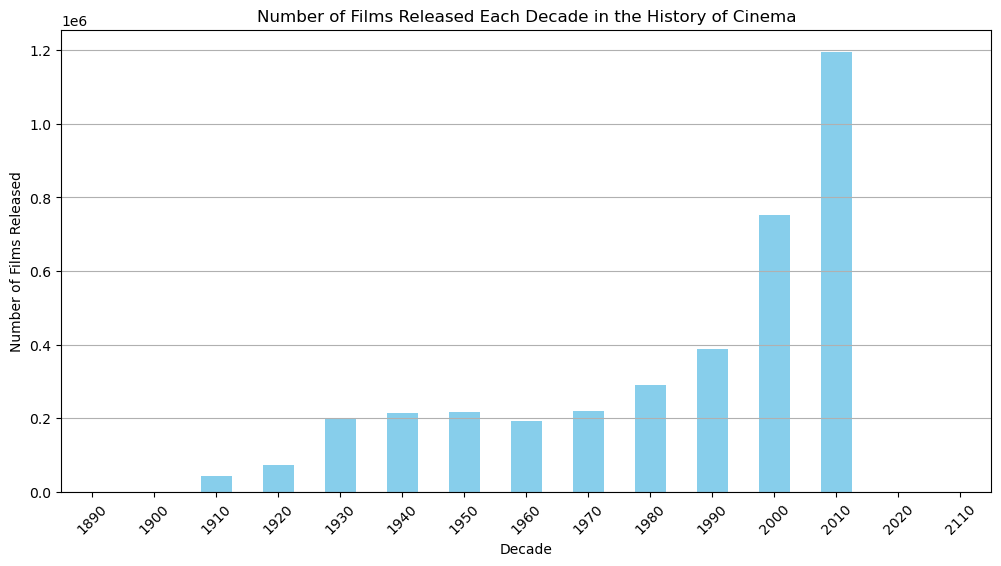

In [2]:
import matplotlib.pyplot as plt


titles['decade'] = titles['year'] // 10 * 10


films_by_decade = titles.groupby('decade').size()


plt.figure(figsize=(12, 6))
films_by_decade.plot(kind='bar', color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Number of Films Released')
plt.title('Number of Films Released Each Decade in the History of Cinema')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# 2. Use groupby() to plot the number of "Halmet" films made each decade

C:\Users\dell\AppData\Local\Temp\ipykernel_19556\3470792181.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_films['decade'] = hamlet_films['year'] // 10 * 10


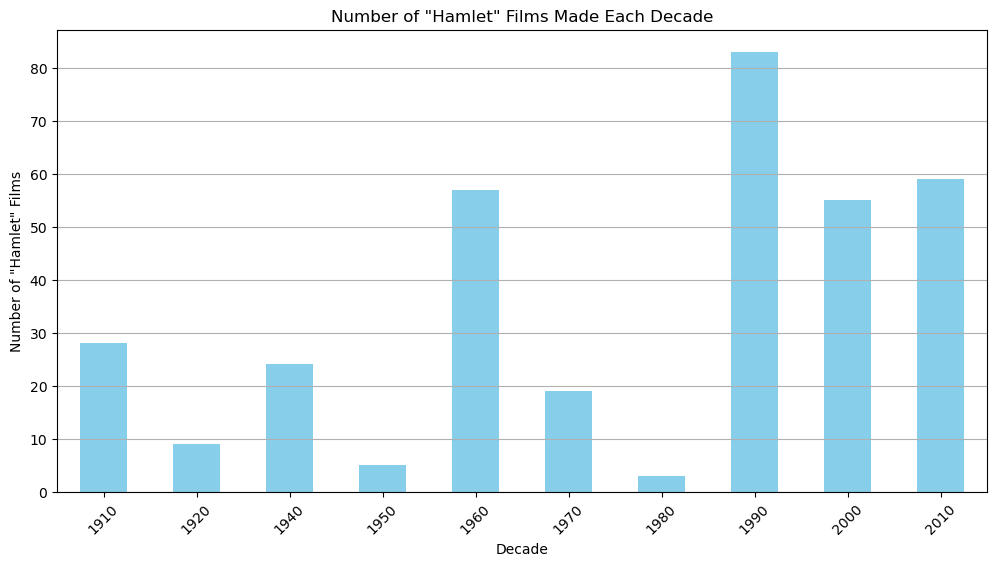

In [3]:
import matplotlib.pyplot as plt


hamlet_films = titles[titles['title'] == 'Hamlet']


hamlet_films['decade'] = hamlet_films['year'] // 10 * 10


hamlet_films_by_decade = hamlet_films.groupby('decade').size()


plt.figure(figsize=(12, 6))
hamlet_films_by_decade.plot(kind='bar', color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Films')
plt.title('Number of "Hamlet" Films Made Each Decade')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# 3.How many leading (n=1) roles were available to actors , and how many to actresses, in each year of the 1950s

In [1]:
import pandas as pd

cast = pd.read_csv('cast.csv', index_col=None)
cast.head()





leading_roles_1950s = cast[(cast['n'] == 1) & (cast['year'] >= 1950) & (cast['year'] <= 1959)]


leading_roles_by_year_gender = leading_roles_1950s.groupby(['year', 'type']).size().unstack(fill_value=0)


print(leading_roles_by_year_gender)


type  actor  actress
year                
1950    625      288
1951    651      285
1952    613      304
1953    664      312
1954    636      316
1955    648      285
1956    668      307
1957    739      315
1958    715      301
1959    733      327


# 4.In 1950s decade taken as a whole , how many total roles were available to actors, and how many , for each "n"number 1 through 5 

In [2]:

roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]


actor_roles_1950s = roles_1950s[roles_1950s['type'] == 'actor']

roles_by_n = actor_roles_1950s[actor_roles_1950s['n'].between(1, 5)].groupby('n').size()


print("Total roles available to actors in the 1950s:", actor_roles_1950s.shape[0])
print("Number of roles for each 'n' number (1 through 5):")
print(roles_by_n)


Total roles available to actors in the 1950s: 157738
Number of roles for each 'n' number (1 through 5):
n
1.0    6692
2.0    4640
3.0    5654
4.0    5663
5.0    5674
dtype: int64


# 5.List in order by year, each if the films in which Frank Oz has played more than 1 role

In [3]:

frank_oz_roles = cast[cast['name'] == 'Frank Oz']


roles_by_movie = frank_oz_roles.groupby(['title', 'year']).size().reset_index(name='role_count')


multiple_roles_movies = roles_by_movie[roles_by_movie['role_count'] > 1]


multiple_roles_movies_sorted = multiple_roles_movies.sort_values(by='year')


print(multiple_roles_movies_sorted)


                                   title  year  role_count
24                      The Muppet Movie  1979           8
0         An American Werewolf in London  1981           2
22                The Great Muppet Caper  1981           6
20                      The Dark Crystal  1982           2
25            The Muppets Take Manhattan  1984           7
2                       Follow That Bird  1985           3
23            The Muppet Christmas Carol  1992           7
7                 Muppet Treasure Island  1996           4
8                     Muppets from Space  1999           4
18  The Adventures of Elmo in Grouchland  1999           3


# # 6.List each of the characters that Frank Oz has potrayed at least twice

In [4]:

frank_oz_roles = cast[cast['name'] == 'Frank Oz']


character_counts = frank_oz_roles['character'].value_counts()


characters_at_least_twice = character_counts[character_counts >= 2]


print(characters_at_least_twice)


Miss Piggy        6
Yoda              6
Animal            6
Cookie Monster    5
Sam the Eagle     5
Fozzie Bear       4
Bert              3
Grover            2
Name: character, dtype: int64
